In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d

17
[-100.   -87.5  -75.   -62.5  -50.   -37.5  -25.   -12.5    0.    12.5
   25.    37.5   50.    62.5   75.    87.5  100. ]


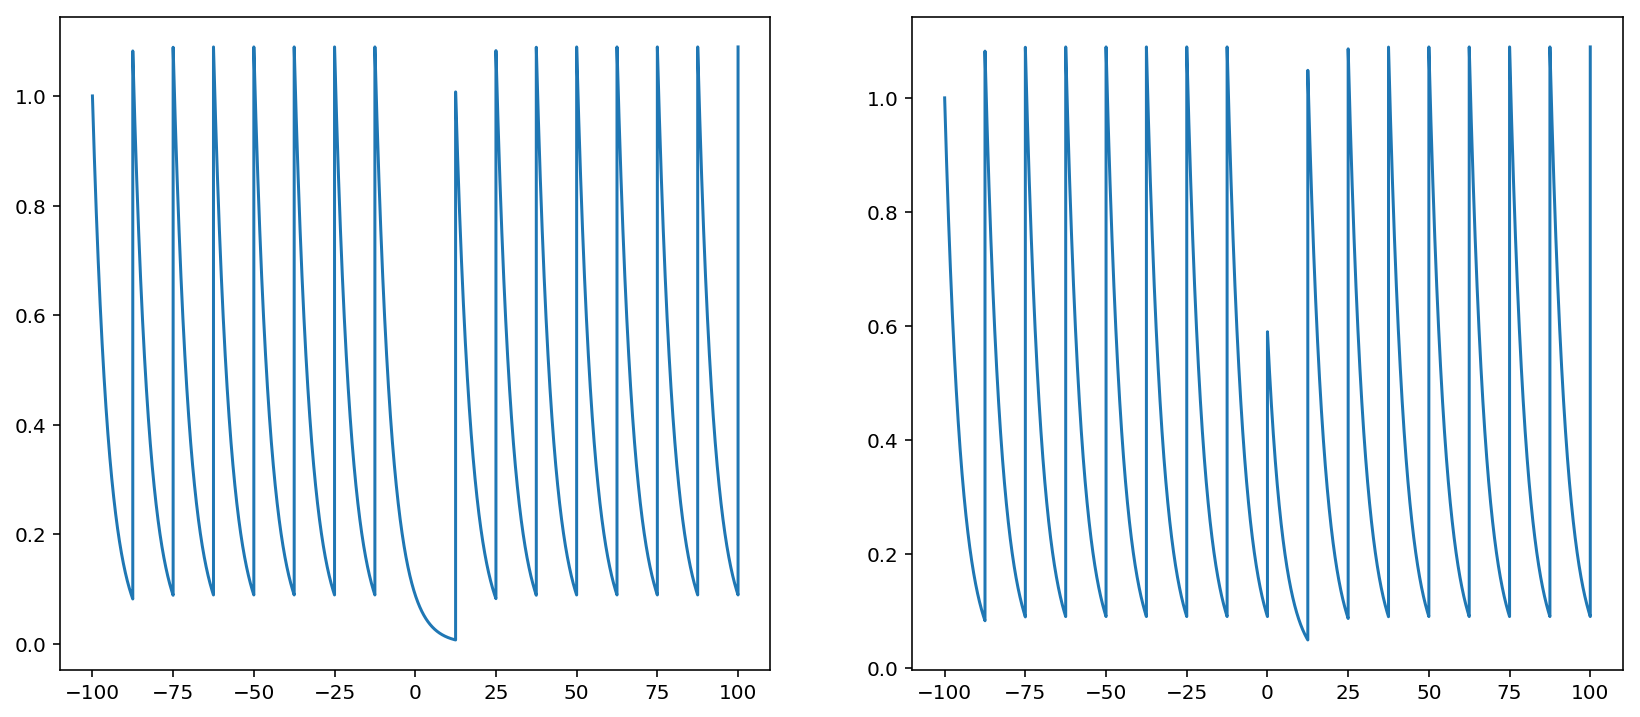

In [2]:
delayRange = 100
numPulses = int(2*np.floor(delayRange/12.5)+1)
print(numPulses)
pulseInRange = np.floor(delayRange/12.5)*12.5
pulses = np.linspace(-pulseInRange,pulseInRange,numPulses)
print(pulses)

numt = 2*delayRange*1000+1 # number of time elements (resolution 100fs if *10000)
tlist = np.linspace (-delayRange, delayRange, numt) #array of time (in ns)
numTau = 2*delayRange*1000+1 # number of delay elements
taulist = np.linspace (-delayRange, delayRange, numTau) #array of delays (in ns)

#make photon flux pulsetrain - each peak is an exponential decay with lifetime gamma
lifetime = 5 # lifetime in ns

#initialise pulsetrain
pulsetrain_1phot = np.zeros(numt)
pulsetrain_2phot = np.zeros(numt)

# fill pulsetrain
for i in range(numPulses):
    if pulses[i] == 0:
        thisPulse = np.exp(-(tlist-pulses[i])/lifetime)
        thisPulse[thisPulse>1] = 0
        thisPulse = thisPulse*0.5
        pulsetrain_2phot = pulsetrain_2phot + thisPulse
    else:
        thisPulse = np.exp(-(tlist-pulses[i])/lifetime)
        thisPulse[thisPulse>1] = 0
        pulsetrain_1phot = pulsetrain_1phot+thisPulse
        pulsetrain_2phot = pulsetrain_2phot+thisPulse

singlepulse = np.exp(-(tlist)/lifetime)
singlepulse[singlepulse>1] = 0
    
fig0 = plt.figure(figsize=(14,6))
ax01 = fig0.add_subplot(121)
ax01.plot(tlist,pulsetrain_1phot)
ax02 = fig0.add_subplot(122)
ax02.plot(tlist,pulsetrain_2phot)


In [3]:
#calculate correlations
autoCorr_1phot = np.correlate(pulsetrain_1phot,singlepulse,"same")
autoCorr_2phot = np.correlate(pulsetrain_2phot,singlepulse,"same")
singleautocorr = np.correlate(singlepulse,singlepulse,"same")

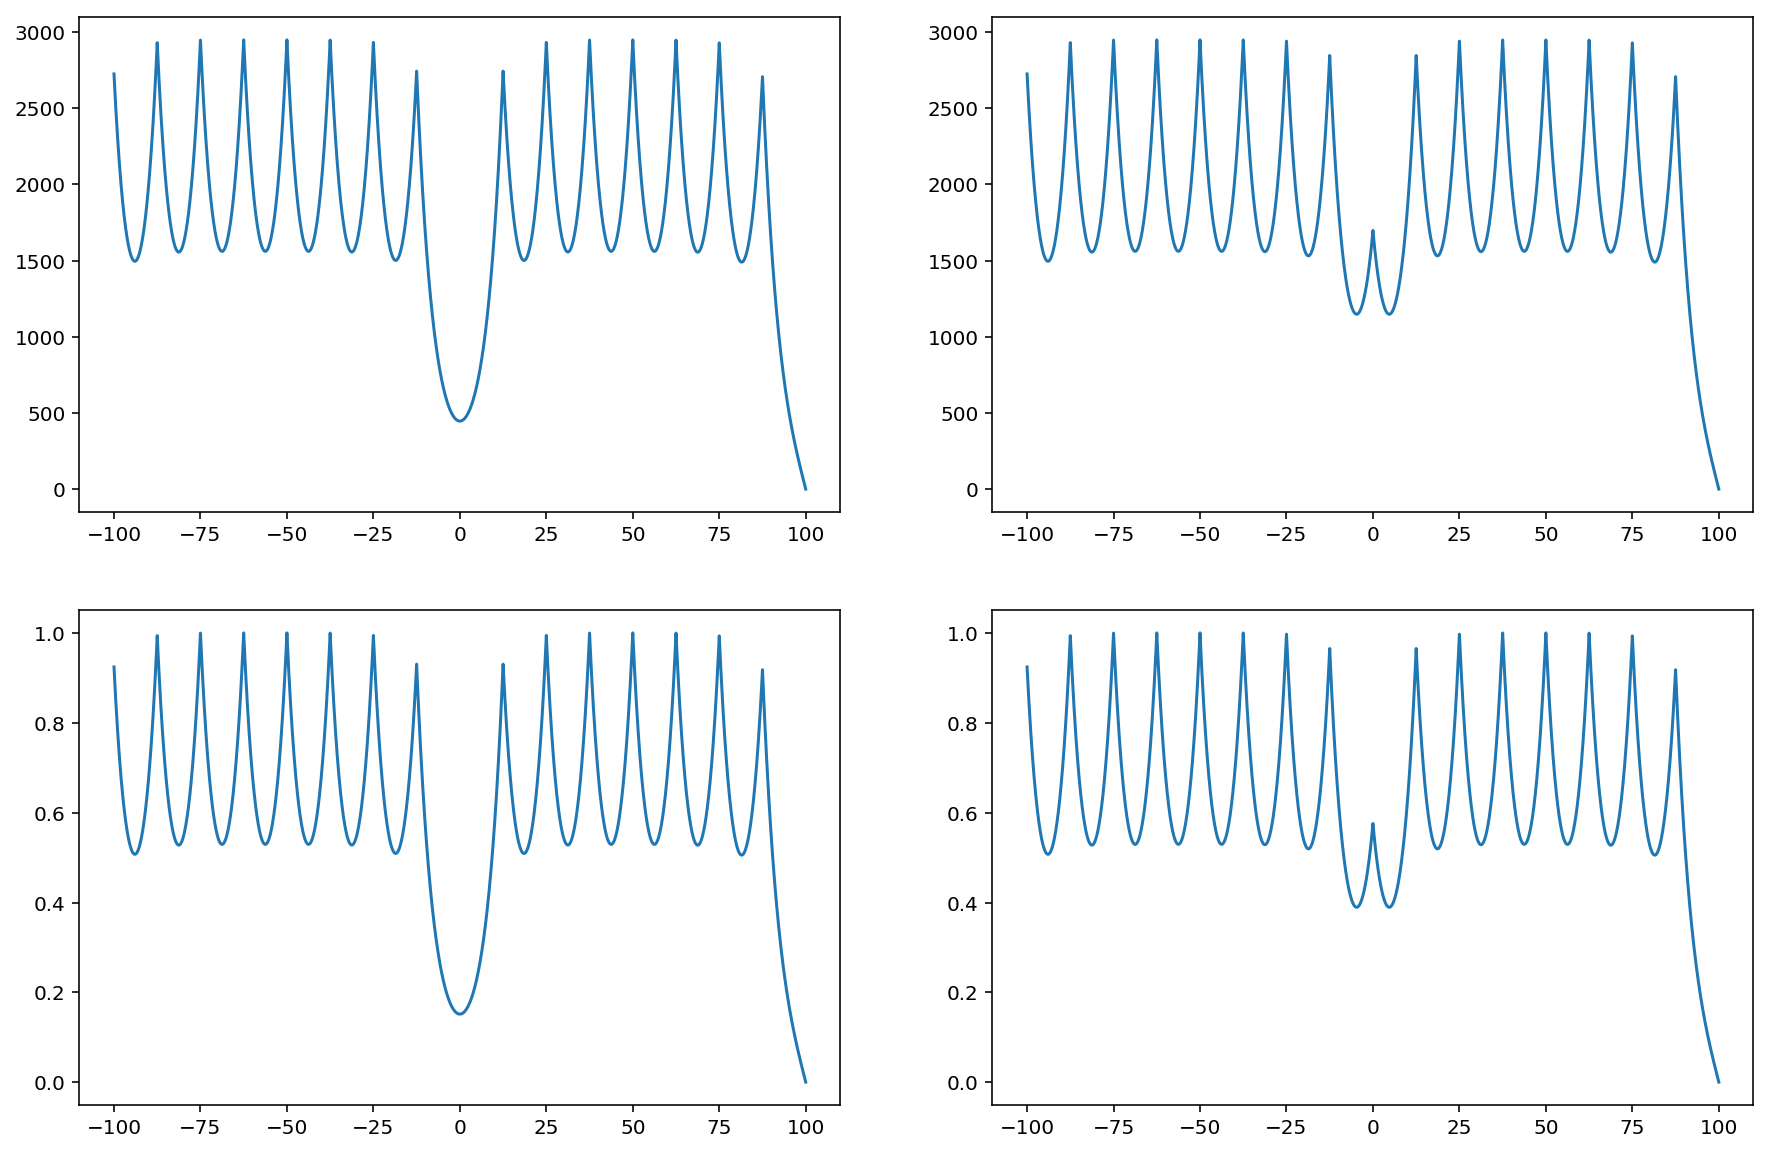

In [4]:
fig1 = plt.figure(figsize=(15,10))
ax11 = fig1.add_subplot(221)
ax11.plot(taulist,autoCorr_1phot)
ax12 = fig1.add_subplot(222)
ax12.plot(taulist,autoCorr_2phot)
g2_1phot = autoCorr_1phot/np.max(autoCorr_1phot)
g2_2phot = autoCorr_2phot/np.max(autoCorr_2phot)
ax13 = fig1.add_subplot(223)
ax13.plot(taulist,g2_1phot)
ax14 = fig1.add_subplot(224)
ax14.plot(taulist,g2_2phot)

(0.01, 1)

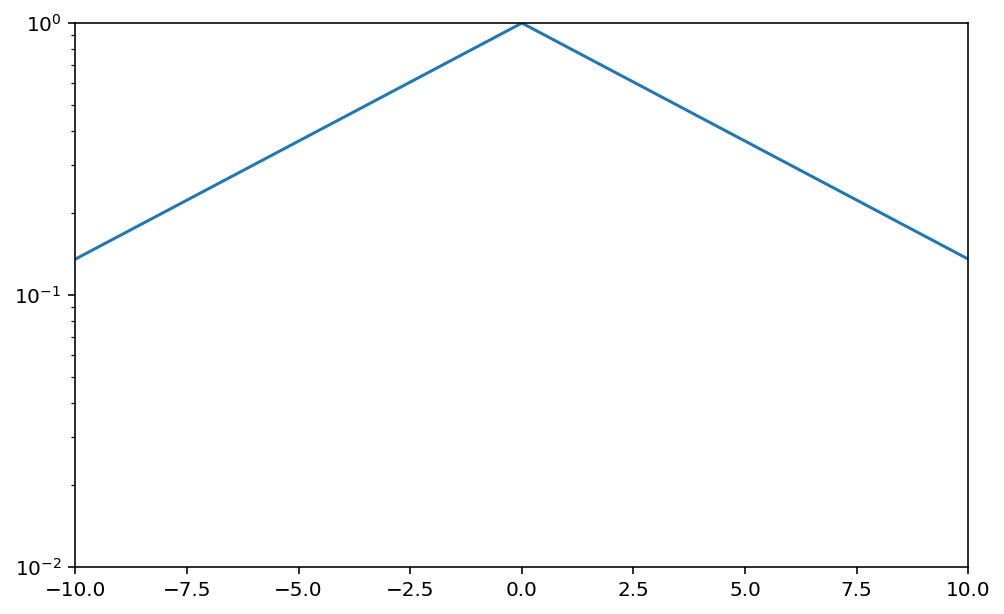

In [5]:
singleautocorr = singleautocorr/np.max(singleautocorr)
fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.semilogy(taulist, singleautocorr)
ax2.set_xlim(-10, 10)
ax2.set_ylim(0.01, 1)

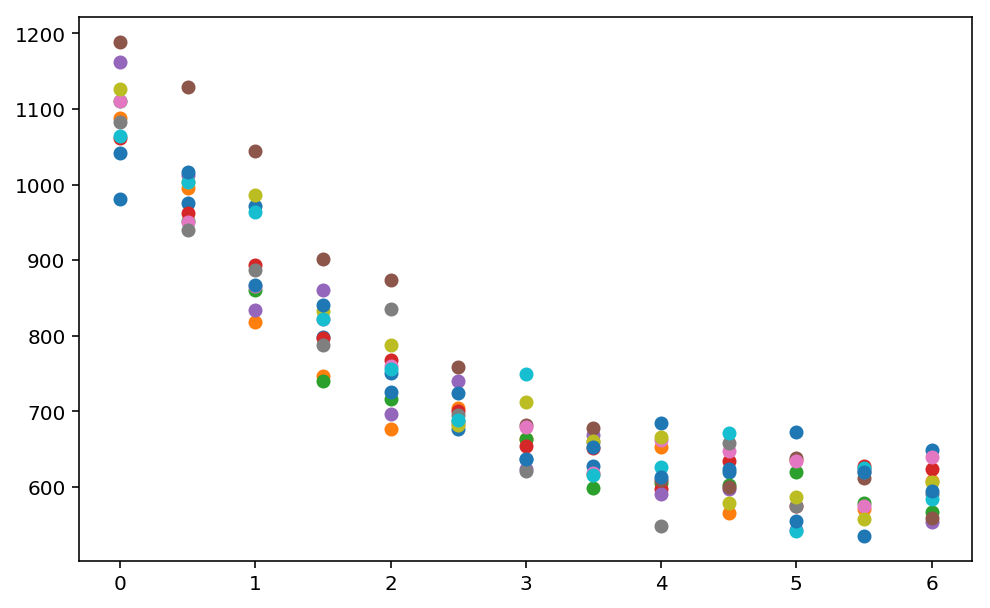

In [6]:
#import experimental data
decay1000 = np.genfromtxt ('decay1000.csv', delimiter=",")
decay_taulist = np.linspace(0,6,13)
fig3, ax3 = plt.subplots(figsize=(8,5))
for ii in range(decay1000[:,0].size):
    ax3.plot(decay_taulist,decay1000[ii,:],'o')


In [64]:
#
#linear fit
fit1000 = np.polyfit(decay_taulist, decay1000.T, 1)